                                                    Ensemble Learning

# 1 Can we use Bagging for regression problems
Yes, Bagging can be used for regression tasks using Bagging Regressor.
It averages predictions from multiple regressors trained on bootstrapped samples.
This reduces variance and improves stability.
It’s ideal for high-variance models like Decision Trees.

# 2 What is the difference between multiple model training and single model training
Single model training builds one model on the entire dataset.
Multiple model training (ensemble) builds several models and combines them.
Ensembles generally increase accuracy and robustness.
They reduce the risk of overfitting or underfitting.

# 3 Explain the concept of feature randomness in Random Forest
In Random Forest, each tree selects a random subset of features for splitting.
This reduces correlation between trees and improves model diversity.
It helps prevent overfitting.
Feature randomness boosts generalization performance.

# 4 What is OOB (Out-of-Bag) Score
OOB score is a built-in validation method in bagging.
Each model is tested on data not included in its training bootstrap sample.
It gives an unbiased performance estimate.
No separate validation set is needed.

# 5 How can you measure the importance of features in a Random Forest model
Feature importance is measured by how much each feature decreases impurity.
Random Forest provides built-in metrics after training.
You can also use permutation importance.
This helps in feature selection and model interpretation.

# 6 Explain the working principle of a Bagging Classifier
Linear kernel works well for linearly separable data; polynomial adds interaction terms; RBF maps data to infinite dimensions for flexibility.
RBF is often the default for complex data, polynomial is good for feature interactions, linear is simpler and faster.

# 7 How do you evaluate a Bagging Classifier’s performance
Use accuracy, precision, recall, F1-score, or AUC as needed.
OOB score offers internal evaluation without a validation set.
Cross-validation can provide robust performance estimates.
Compare with baseline models for insight.


# 8 How does a Bagging Regressor work
It trains multiple regressors on bootstrapped samples of data.
Final prediction is the average of all model predictions.
This smooths out noise and reduces overfitting.
It’s especially effective for unstable regression models.

# 9 What is the main advantage of ensemble techniques
They combine multiple models to improve prediction performance.
They reduce bias, variance, or both depending on the method.
They are more robust to noise and overfitting.
Often outperform single models in real-world tasks.

# 10 What is the main challenge of ensemble methods
They are more complex and harder to interpret.
They can be computationally expensive and time-consuming.
Parameter tuning can be difficult.
Ensembles may not help if base models are weak or data is small.

# 11 Explain the key idea behind ensemble techniques
Ensemble learning combines multiple base models to form a stronger model.
It leverages the diversity of individual learners.
The goal is better generalization and accuracy.
Ensembles outperform individual models by averaging or boosting.

# 12 What is a Random Forest Classifier
It’s an ensemble of Decision Trees built using bagging and feature randomness.
Each tree votes and the majority class becomes the final prediction.
It reduces overfitting compared to a single tree.
Random Forest is accurate, scalable, and robust.

# 13 What are the main types of ensemble techniques
Three main types are Bagging, Boosting, and Stacking.
Bagging trains models independently; Boosting trains sequentially.
Stacking combines multiple models with a meta-learner.
Each has unique strengths depending on data and task.

# 14 What is ensemble learning in machine learning
It is a method of combining multiple models to improve performance.
It reduces errors from individual learners.
It works by voting, averaging, or learning how to combine models.
Common in competitions and real-world applications.

# 15 When should we avoid using ensemble methods
Avoid when model simplicity or interpretability is critical.
Also avoid with small datasets or when time/resources are limited.
If a simple model performs well, ensembles may be unnecessary.
They’re not always worth the added complexity.

# 16 How does Bagging help in reducing overfitting
Bagging trains models on different data samples to reduce variance.
Averaging predictions smooths out fluctuations caused by overfitting.
It reduces model sensitivity to noise.
This leads to better generalization on unseen data.

# 17 Why is Random Forest better than a single Decision Tree
A single tree is prone to overfitting and variance.
Random Forest averages many trees, reducing error and increasing accuracy.
It’s more robust and stable.
Also provides insights like feature importance.

# 18 What is the role of bootstrap sampling in Bagging
Bootstrap sampling creates varied datasets by sampling with replacement.
Each base model sees a slightly different version of the data.
This introduces diversity among models.
It’s crucial for reducing overfitting and variance.

# 19 What are some real-world applications of ensemble techniques
Used in fraud detection, spam filtering, medical diagnosis, and stock prediction.
Also applied in recommendation systems, credit scoring, and customer churn.
Widely used in image and speech recognition.
Ensembles are common in winning Kaggle competitions.

# 20 What is the difference between Bagging and Boosting?
Bagging trains models in parallel and focuses on variance reduction.
Boosting trains sequentially, correcting errors from previous models.
Bagging is less prone to overfitting; boosting can overfit if not controlled.
Both aim to improve performance but use different strategies.

In [2]:
# 21 Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier with Decision Trees (use 'estimator' instead of 'base_estimator')
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")


Bagging Classifier Accuracy: 1.0000


In [3]:
# 22 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with Decision Trees
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_regressor.predict(X_test)

# Evaluate using MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")



Mean Squared Error (MSE): 2887.26


In [4]:
# 23 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores:\n")
print(feature_importance_df)


Feature Importance Scores:

                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          

In [5]:
# 24 Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Train a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Compare performance
print(f"Decision Tree MSE: {dt_mse:.4f}")
print(f"Random Forest MSE: {rf_mse:.4f}")



Decision Tree MSE: 0.5280
Random Forest MSE: 0.2565


In [6]:
# 25 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train Random Forest with OOB enabled
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf.fit(X, y)

# Print OOB score
print(f"OOB Score: {rf_clf.oob_score_:.4f}")



OOB Score: 0.9613


In [7]:
# 26 Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Bagging Classifier with SVM base estimator
svm = SVC(kernel='rbf', gamma='scale')
bagging_clf = BaggingClassifier(estimator=svm, n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier with SVM Accuracy: {accuracy:.4f}")



Bagging Classifier with SVM Accuracy: 1.0000


In [8]:
# 27 Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different numbers of trees to test
n_estimators_list = [10, 50, 100, 200]

print("Random Forest Accuracy with different n_estimators:")
for n in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"  Trees: {n:3} | Accuracy: {accuracy:.4f}")


Random Forest Accuracy with different n_estimators:
  Trees:  10 | Accuracy: 0.9649
  Trees:  50 | Accuracy: 0.9708
  Trees: 100 | Accuracy: 0.9708
  Trees: 200 | Accuracy: 0.9708


In [9]:
# 28 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier with Logistic Regression
bagging_clf = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_train, y_train)

# Predict probabilities
y_proba = bagging_clf.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9984


In [10]:
# 29 Train a Random Forest Regressor and analyze feature importance scores
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Get feature importances
importances = rf_reg.feature_importances_

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feat_importance_df)

# Optional: Display top 3 important features
top_features = feat_importance_df.head(3)
print("\nTop 3 Important Features:")
print(top_features)


Feature Importance Scores:
      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995

Top 3 Important Features:
     Feature  Importance
0     MedInc    0.526011
5   AveOccup    0.138220
7  Longitude    0.086124


In [12]:
# 30 Train an ensemble model using both Bagging and Random Forest and compare accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging with Decision Trees (use 'estimator' param)
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Results
print(f"Bagging Classifier Accuracy:     {acc_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {acc_rf:.4f}")



Bagging Classifier Accuracy:     0.9591
Random Forest Classifier Accuracy: 0.9708


In [13]:
# 31 Train a Random Forest Classifier and tune hyperparameters using GridSearch
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Train and tune
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.9649


n_estimators: 10, MSE: 0.2862
n_estimators: 50, MSE: 0.2579
n_estimators: 100, MSE: 0.2568
n_estimators: 200, MSE: 0.2542


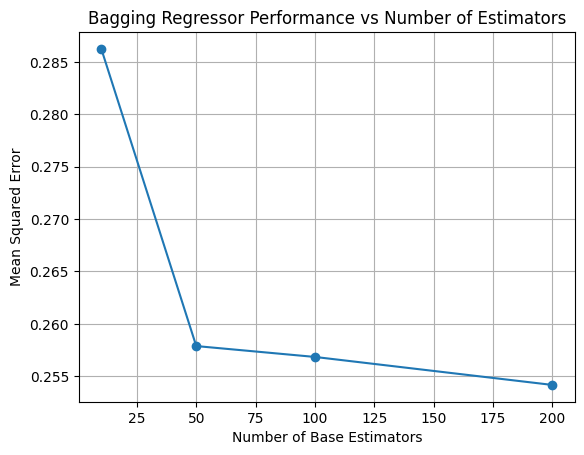

In [17]:
# 32 Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different numbers of base estimators to try
n_estimators_list = [10, 50, 100, 200]

mse_scores = []

for n in n_estimators_list:
    # Initialize Bagging Regressor with Decision Trees
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    
    # Train
    bagging_reg.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"n_estimators: {n}, MSE: {mse:.4f}")

# Plot MSE vs number of estimators
plt.plot(n_estimators_list, mse_scores, marker='o')
plt.title('Bagging Regressor Performance vs Number of Estimators')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()



In [18]:
# 33 Train a Random Forest Classifier and analyze misclassified samples
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Evaluate accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Identify misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]

print("\nMisclassified Samples:")
for idx in misclassified_indices:
    print(f"Index: {idx}, True label: {data.target_names[y_test[idx]]}, Predicted label: {data.target_names[y_pred[idx]]}")



Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Misclassified Samples:


In [20]:
# 34 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train single Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Train Bagging Classifier with Decision Trees (use 'estimator' instead of 'base_estimator')
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate and compare
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt, target_names=data.target_names))

print("\nBagging Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}")
print(classification_report(y_test, y_pred_bagging, target_names=data.target_names))



Decision Tree Classifier:
Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Bagging Classifier:
Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



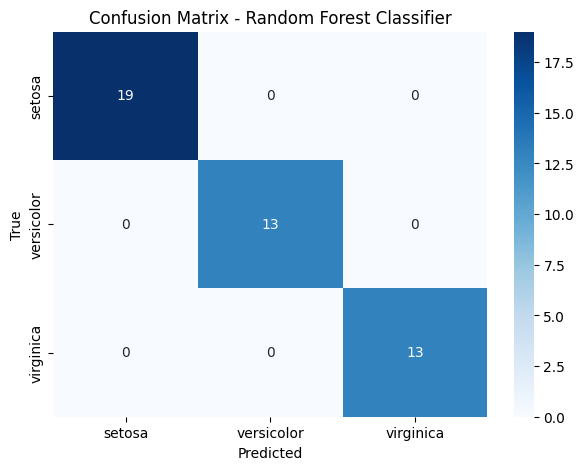

In [21]:
# 35 Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X, y = data.data, data.target
target_names = data.target_names

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [22]:
# 36 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base models
base_estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Define stacking classifier with Logistic Regression as final estimator
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), cv=5)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate stacking model
y_pred_stack = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")

# Train and evaluate base models individually
for name, model in base_estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Stacking Classifier Accuracy: 1.0000
dt Accuracy: 1.0000
svm Accuracy: 1.0000
lr Accuracy: 1.0000


In [23]:
# 37 Train a Random Forest Classifier and print the top 5 most important features
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances and indices of top 5 features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:5]

print("Top 5 most important features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Top 5 most important features:
petal width (cm): 0.4340
petal length (cm): 0.4173
sepal length (cm): 0.1041
sepal width (cm): 0.0446


In [24]:
# 38 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# For simplicity, let's make it a binary classification problem (class 0 vs rest)
y_binary = (y == 0).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_train, y_train)

# Predict
y_pred = bagging_clf.predict(X_test)

# Evaluate
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")



Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


max_depth = 1: Accuracy = 1.0000
max_depth = 2: Accuracy = 1.0000
max_depth = 3: Accuracy = 1.0000
max_depth = 4: Accuracy = 1.0000
max_depth = 5: Accuracy = 1.0000
max_depth = 6: Accuracy = 1.0000
max_depth = None: Accuracy = 1.0000


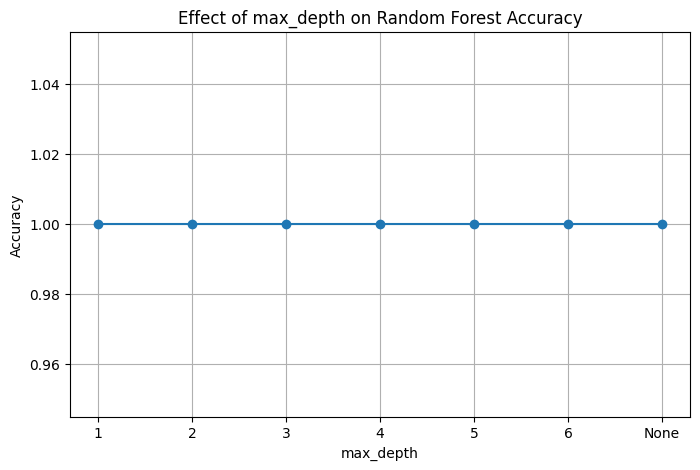

In [25]:
# 39 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different max_depth values
max_depth_values = [1, 2, 3, 4, 5, 6, None]
accuracies = []

for depth in max_depth_values:
    rf_clf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"max_depth = {depth}: Accuracy = {acc:.4f}")

# Plot accuracy vs max_depth
plt.figure(figsize=(8,5))
plt.plot([str(d) for d in max_depth_values], accuracies, marker='o')
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [27]:
# 40 Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base estimators to try
base_estimators = {
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate Bagging Regressor for each base estimator
for name, estimator in base_estimators.items():
    bagging_reg = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bagging with {name} base estimator - MSE: {mse:.4f}")



Bagging with Decision Tree base estimator - MSE: 0.2579
Bagging with K-Nearest Neighbors base estimator - MSE: 1.1021


ROC-AUC Score: 0.9968


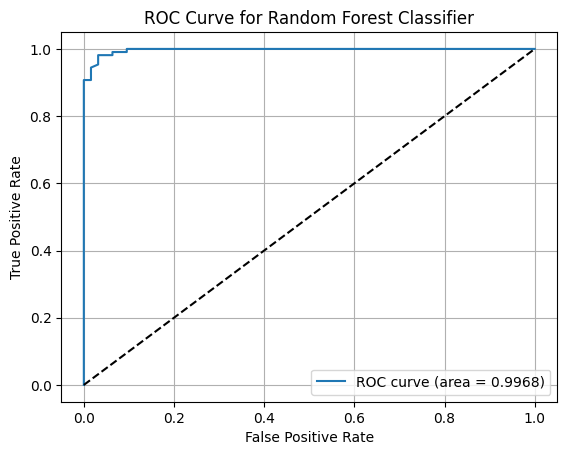

In [28]:
# 41 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [29]:
# 42 Train a Bagging Classifier and evaluate its performance using cross-validation
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize Bagging Classifier with Decision Trees as base estimators
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # use 'estimator' instead of deprecated 'base_estimator'
    n_estimators=50,
    random_state=42
)

# Perform 5-fold cross-validation and compute accuracy scores
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean Accuracy: 0.9544
Standard Deviation: 0.0339


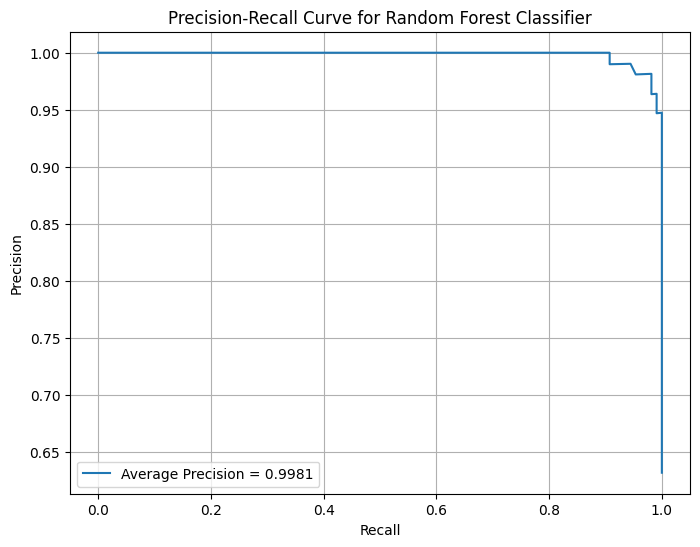

In [30]:
# 43 Train a Random Forest Classifier and plot the Precision-Recall curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = rf_clf.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# 44 Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize Stacking Classifier with Random Forest and Logistic Regression
estimators = [('rf', rf), ('lr', lr)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train base models and stacking model
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_stack = stacking_clf.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")


c:\Users\Hari Vignesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hari Vignesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Random Forest Accuracy: 0.9708
Logistic Regression Accuracy: 0.9649
Stacking Classifier Accuracy: 0.9708


c:\Users\Hari Vignesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bootstrap=True, Mean Squared Error: 0.2568
Bootstrap=False, Mean Squared Error: 0.4968


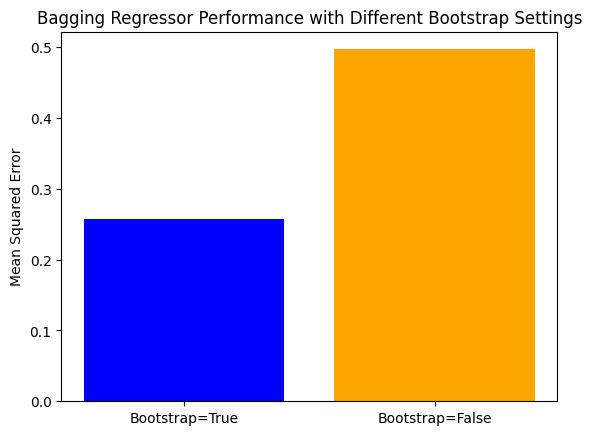

In [33]:
# 45 Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different bootstrap settings to test
bootstrap_options = [True, False]
mse_scores = []

for bootstrap in bootstrap_options:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),  # updated parameter here
        n_estimators=100,
        bootstrap=bootstrap,
        random_state=42
    )
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Bootstrap={bootstrap}, Mean Squared Error: {mse:.4f}")

# Plot comparison
plt.bar(['Bootstrap=True', 'Bootstrap=False'], mse_scores, color=['blue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Bagging Regressor Performance with Different Bootstrap Settings')
plt.show()

